Author: Group E <br>
Date: 2021-03-06 <br>
Licence: MIT License <br>

# Group E Assignment - Bike Sharing Prediction

### Table of Contents:
1. Introduction
2. Exploratory Data Analysis
3. Data Engineering
4. Data Visualization
5. ML Predictive Analytics
6. Conclusion

## 1.Introduction
* Center of study: USA bike sharing industry
* Key: exploratory data analysis --> ensure data quality & give meaningful insights

In [1]:
# importing IPython relevant libraries
from IPython.display import Image
from IPython.core.display import HTML

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

# insert image
Image(url= "https://images.unsplash.com/photo-1530818021323-3d2bf2af7a87?ixlib=rb-1.2.1&ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&auto=format&fit=crop&w=1000&q=80")

### 1.1 Feature descriptions:
The features present in this report are defined as follows:
* **instant**: record index
* **dteday**: date
* **hr**: hour (0 to 23)
* **weathersit**: Weather situation
* **temp**: Normalized temperature in Celsius. The values are divided to 41 (max)
* **atemp**: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
* **hum**: Normalized humidity. The values are divided to 100 (max)
* **windspeed**: Normalized wind speed. The values are divided to 67 (max)
* **casual**: count of casual users
* **registered**: count of registered users
* **cnt**: count of total rental bikes including both casual and registered

## 2. Exploratory Analysis
### 2.1 Setting up the Environment
1. Importing the most important libraries, 'pandas' and 'numpy'. 
2. The dataset is imported and stored as 'df'
3. 'instant' is set as the index column of our dataset. 
4. A few lines of code including the following are run to explore the dataset. <br>
    a. __Head()__ <br>
    b. __Tail()__<br>
    c. __describe()__<br>
    d. __df.dtypes__ (checking if all the columns are in the data type we need) <br>
    e. __index.is_unique__ (To check if the index, 'passengerId' is unique) <br>
    f. __index.is_monotonic_increasing__ (To check if the index, 'passengerId' is incresaing in a monotonic manner.

In [2]:
# importing data wrangling and data visualization libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys
#!{sys.executable} -m pip3 install holidays
import holidays
import datetime
import seaborn as sns
from ipywidgets import interact
import matplotlib.dates as mdates

# importing preprocessing libraries
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, Normalizer, normalize, MinMaxScaler, RobustScaler, StandardScaler, StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve
from sklearn.metrics import r2_score, confusion_matrix
from sklearn import set_config

# importing machine learning components
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [3]:
# importing the dataset with correct index column and parsing the dates:
df = pd.read_csv("hour.csv", index_col="instant", parse_dates=["dteday"]) #parse dates
df.head()

,dteday,hr,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,
1,2011-01-01,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.81,0.0,3,13,16
2,2011-01-01,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.22,0.2727,0.80,0.0,8,32,40
3,2011-01-01,2,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.22,0.2727,0.80,0.0,5,27,32
4,2011-01-01,3,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.75,0.0,3,10,13
5,2011-01-01,4,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.75,0.0,0,1,1


In [4]:
# checking the bottom of the data set
df.tail()

,dteday,hr,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,
17375,2012-12-31,19,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.26,0.2576,0.60,0.1642,11,108,119
17376,2012-12-31,20,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.26,0.2576,0.60,0.1642,8,81,89
17377,2012-12-31,21,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.26,0.2576,0.60,0.1642,7,83,90
17378,2012-12-31,22,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.26,0.2727,0.56,0.1343,13,48,61
17379,2012-12-31,23,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.26,0.2727,0.65,0.1343,12,37,49


In [5]:
# checking the summary statistics of the data set
df.describe()

,hr,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17280.000000,17279.000000,17279.000000,17279.000000,17379.000000,17379.000000,17379.000000
mean,11.546752,0.497071,0.475530,0.627235,0.190114,35.676218,153.786869,189.463088
std,6.914405,0.192474,0.171782,0.193047,0.122378,49.305030,151.357286,181.387599
min,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,6.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,12.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,18.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,23.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [6]:
print("Column data types:")
df.dtypes

Column data types:


dteday        datetime64[ns]
hr                     int64
weathersit            object
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

In [7]:
# checking for monotonicity
print("Is the index increasing monotonically?")
print(df.index.is_monotonic_increasing)
print("Is the index unique?")
print(df.index.is_unique)

Is the index increasing monotonically?
True
Is the index unique?
True


In [8]:
# counting nan values
count_nan = len(df) - df.count()
count_nan

dteday          0
hr              0
weathersit    100
temp           99
atemp         100
hum           100
windspeed     100
casual          0
registered      0
cnt             0
dtype: int64

In [9]:
# defining a constant seed to be able to replicate same conditions:
seed=120

## 3. Data Engineering

### 3.1: Creating columns for year, month, weekday and season. 
Seasons were defined as follows: 
- Winter: Dec - Feb (1)
- Spring: Mar - May (2)
- Summer: Jun - Aug (3)
- Autumn: Sep - Nov (4)

In [10]:
# parsing the date info into new columns for year, month and weekday respectively
df['year'] = pd.DatetimeIndex(df['dteday']).year
df['month'] = pd.DatetimeIndex(df['dteday']).month
df['weekday'] = pd.DatetimeIndex(df['dteday']).weekday
df['season'] = df.month%12 // 3 + 1   # ARE WE SURE THIS IS CORRECT?
df.tail()

,dteday,hr,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month,weekday,season
instant,,,,,,,,,,,,,,
17375,2012-12-31,19,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.26,0.2576,0.60,0.1642,11,108,119,2012,12,0,1
17376,2012-12-31,20,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.26,0.2576,0.60,0.1642,8,81,89,2012,12,0,1
17377,2012-12-31,21,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.26,0.2576,0.60,0.1642,7,83,90,2012,12,0,1
17378,2012-12-31,22,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.26,0.2727,0.56,0.1343,13,48,61,2012,12,0,1
17379,2012-12-31,23,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.26,0.2727,0.65,0.1343,12,37,49,2012,12,0,1


### 3.2: Creating binary columns
It is important to differentiate amongst some daily trends: 
- holiday (1) vs regular day (0), 
- weekday (1) vs weekend (0),
- rush hour (1) vs normal hour (0)

#### 3.2.2 Creating binary columns for holidays: is_holiday

In [11]:
# composing a holiday list and running the list with a for loop to grasp individual holidays in the given time frame 
holidays_list = []
for date in holidays.UnitedStates(years=[2011, 2012]).items():
    holidays_list.append(str(date[0]))
    
print("Special days for the US:")
print(holidays_list, end=',')

Special days for the US:
['2011-01-01', '2010-12-31', '2011-01-17', '2011-02-21', '2011-05-30', '2011-07-04', '2011-09-05', '2011-10-10', '2011-11-11', '2011-11-24', '2011-12-25', '2011-12-26', '2012-01-01', '2012-01-02', '2012-01-16', '2012-02-20', '2012-05-28', '2012-07-04', '2012-09-03', '2012-10-08', '2012-11-11', '2012-11-12', '2012-11-22', '2012-12-25'],

In [12]:
# create the new column as is_holiday according to dteday
df['is_holiday'] = np.where(df['dteday'].isin(holidays_list), 1, 0)

#### 3.2.3 Creating binary column for weekday: is_weekday

In [13]:
# create the new column as is_weekday according to weekday
df['is_weekday'] = np.where(df['weekday'].isin([5, 6]), 0, 1)

#### 3.2.4 Creating binary column for rush hours: is_rushhour

In [14]:
# create the new column as is_rushhour according to hr
df['is_rushhour'] = np.where(df['hr'].isin([7, 8, 12, 13, 14, 15, 16, 17, 18, 19]), 1, 0)

In [15]:
df

,dteday,hr,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month,weekday,season,is_holiday,is_weekday,is_rushhour
instant,,,,,,,,,,,,,,,,,
1,2011-01-01,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.81,0.0000,3,13,16,2011,1,5,1,1,0,0
2,2011-01-01,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.22,0.2727,0.80,0.0000,8,32,40,2011,1,5,1,1,0,0
3,2011-01-01,2,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.22,0.2727,0.80,0.0000,5,27,32,2011,1,5,1,1,0,0
4,2011-01-01,3,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.75,0.0000,3,10,13,2011,1,5,1,1,0,0
5,2011-01-01,4,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.75,0.0000,0,1,1,2011,1,5,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17375,2012-12-31,19,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.26,0.2576,0.60,0.1642,11,108,119,2012,12,0,1,0,1,1
17376,2012-12-31,20,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.26,0.2576,0.60,0.1642,8,81,89,2012,12,0,1,0,1,0
17377,2012-12-31,21,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.26,0.2576,0.60,0.1642,7,83,90,2012,12,0,1,0,1,0


### 3.4 Dropping casual and registered columns 
These columns are irrelevant in the context of the study at hand

In [16]:
df = df.drop(['casual', 'registered'], axis=1)

## 4. Visualizing Dataframe

In [17]:
#For better theming sns.set was applied:
sns.set()

### 4.1 Correlation Analysis

* Rides: relatively high correlation with hr(0.39), temp(0.41) and hum(-0.32)
* Windspeed: relatively low correlation
* Notable: there is a high correlation between atemp & temp (actual vs feels like)

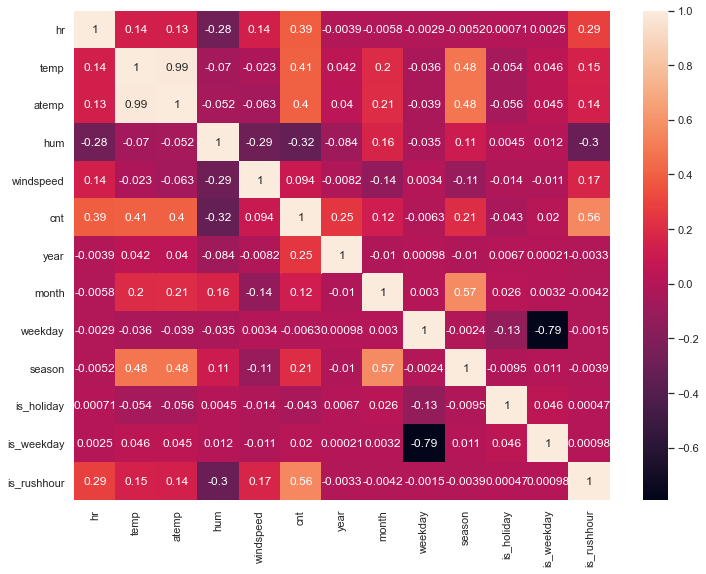

In [18]:
plt.subplots(figsize=(12,9))
sns.heatmap(df.corr(), annot=True);

### 4.2 Summarizing weather conditions and rides by date, timeofday and weather situation

In [58]:
meanweather = df.groupby(['weathersit','dteday'])['temp', 'atemp', 'hum', 'windspeed', 'cnt'].mean().round(3)
meanweather

temp  atemp  \
weathersit                                         dteday                     
Clear, Few clouds, Partly cloudy, Partly cloudy    2011-01-01  0.275  0.311   
                                                   2011-01-02  0.280  0.260   
                                                   2011-01-03  0.197  0.189   
                                                   2011-01-04  0.202  0.216   
                                                   2011-01-05  0.227  0.229   
...                                                              ...    ...   
Mist + Cloudy, Mist + Broken clouds, Mist + Few... 2012-12-27  0.250  0.223   
                                                   2012-12-28  0.258  0.261   
                                                   2012-12-29  0.256  0.242   
                                                   2012-12-30  0.255  0.231   
                                                   2012-12-31  0.247  0.253   

                                                                 hum  \
weathersit                                         dteday              
Clear, Few clouds, Partly cloudy, Partly cloudy    2011-01-01  0.785   
                                                   2011-01-02  0.455   
                                                   2011-01-03  0.437   
                                                   2011-01-04  0.586   
                                                   2011-01-05  0.437   
...                                                              ...   
Mist + Cloudy, Mist + Broken clouds, Mist + Few... 2012-12-27  0.644   
                                                   2012-12-28  0.588   
                                                   2012-12-29  0.718   
                                                   2012-12-30  0.535   
                                                   2012-12-31  0.539   

                                                               windspeed  \
weathersit                                         dteday                  
Clear, Few clouds, Partly cloudy, Partly cloudy    2011-01-01      0.068   
                                                   2011-01-02      0.299   
                                                   2011-01-03      0.242   
                                                   2011-01-04      0.153   
                                                   2011-01-05      0.187   
...                                                                  ...   
Mist + Cloudy, Mist + Broken clouds, Mist + Few... 2012-12-27      0.336   
                                                   2012-12-28      0.143   
                                                   2012-12-29      0.147   
                                                   2012-12-30      0.315   
                                                   2012-12-31      0.158   

                                                                   cnt  
weathersit                                         dteday               
Clear, Few clouds, Partly cloudy, Partly cloudy    2011-01-01   25.417  
                                                   2011-01-02   27.500  
                                                   2011-01-03   61.318  
                                                   2011-01-04   69.091  
                                                   2011-01-05   69.565  
...                                                                ...  
Mist + Cloudy, Mist + Broken clouds, Mist + Few... 2012-12-27   92.417  
                                                   2012-12-28  128.471  
                                                   2012-12-29   44.750  
                                                   2012-12-30   30.625  
                                                   2012-12-31  177.583  

[1570 rows x 5 columns]

### 4.3 Interactive Time-series
Show number of people in different hours on an interactive graph:

In [20]:
# prepare the data set
df_newdate = df.copy()
df_newdate['newdate'] = df_newdate["dteday"] + df_newdate['hr'].apply(np.ceil).\
                apply(lambda x:pd.Timedelta(x, unit = 'H'))
df_newdate = df_newdate.set_index('newdate')

# define the function
def f(Hour):
    # now we will create only one plot, but we can add more in the parameter
    fig, axes = plt.subplots(1,1, figsize=(20,7), sharex=True)
    
    plt.rcParams['axes.facecolor'] = 'white'
    filtro = 'hr =='+ str(Hour)
    df1 = df_newdate.query(filtro)
    df1["cnt"].plot(subplots=True)
    
    c_winter = '#cf96ff'
    c_summer = '#f5e077'

    # visualizing the 2 seasons areas in the plot
    recs2k_bgn = '2011-01-01'
    recs2k_end = '2011-03-01'
    plt.axvspan(recs2k_bgn, recs2k_end, facecolor=c_winter, alpha=0.5)

    recs2k_bgn = '2011-03-01'
    recs2k_end = '2011-09-01'
    plt.axvspan(recs2k_bgn, recs2k_end, facecolor=c_summer, alpha=0.5)

    recs2k_bgn = '2011-09-01'
    recs2k_end = '2012-03-01'
    plt.axvspan(recs2k_bgn, recs2k_end, facecolor=c_winter, alpha=0.5)

    recs2k_bgn = '2012-03-01'
    recs2k_end = '2012-09-01'
    plt.axvspan(recs2k_bgn, recs2k_end, facecolor=c_summer, alpha=0.5)

    recs2k_bgn = '2012-09-01'
    recs2k_end = '2013-02-01'
    plt.axvspan(recs2k_bgn, recs2k_end, facecolor=c_winter, alpha=0.5)

    plt.title('In Red - Mean of total rides', fontsize=15, color='#ff475e', loc='left')
    axes.axhline(df.mean(axis=0)["cnt" ] , color='#ff475e', linestyle='-', linewidth=1)
    
    # add titles
    axes.set_title('Monthly Spring/Summer Yellow', fontsize=20)
    
    # add axis labels
    axes.set_ylabel('Number of trips per day', fontsize=15)
    axes.set_xlabel('Bike Ride Date', fontsize=15)

    # update axis X tick labels
    loc = mdates.MonthLocator(interval=2)
    axes.xaxis.set_major_locator(loc)
    fmt = mdates.DateFormatter('%b\n%Y')
    axes.xaxis.set_major_formatter(fmt)

interactive_plot = interact(f, Hour=(1, 23))
interactive_plot

interactive(children=(IntSlider(value=12, description='Hour', max=23, min=1), Output()), _dom_classes=('widget…

<function __main__.f(Hour)>

### 4.4 Ride count analysis
#### 4.4.1 Ride counts in relation to temp
Rides are highest when temprature is in the range of 0.4 to 0.8. Lowest rides can be observed when it's colder. 

Text(30.990633333333335, 0.5, 'Count of all Bikes Rented')

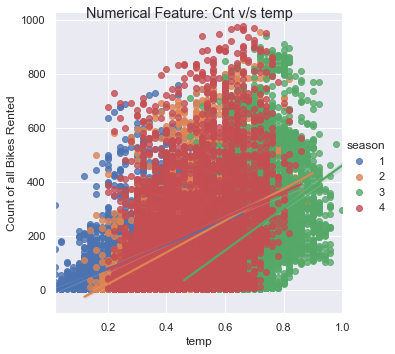

In [21]:
# reset the graph theme
sns.set()

sns.lmplot(x="temp", y="cnt", data=df, hue="season")
plt.suptitle('Numerical Feature: Cnt v/s temp')
plt.xlabel('temp')
plt.ylabel('Count of all Bikes Rented')

#### 4.4.2 Ride counts in relation to atemp
* Unsurprisingly: very same can be observed for atemp
* Highest rides: temprature between 0.4 & 0.8
* Lowest rides: colder

Text(30.990633333333335, 0.5, 'Count of all Biks Rented')

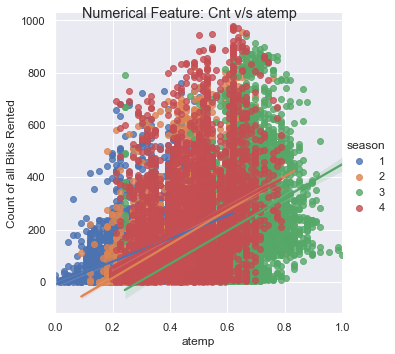

In [22]:
sns.lmplot(x="atemp", y="cnt", data=df, hue="season")
plt.suptitle('Numerical Feature: Cnt v/s atemp')
plt.xlabel('atemp')
plt.ylabel('Count of all Biks Rented')

#### 4.4.3 Ride counts in relation to humidity 
* Humidity no massive impact on ride bookings. 
* Preliminary rejected assumption: humidity would affect the bike riding behavior more

Text(30.990633333333335, 0.5, 'Count of all Biks Rented')

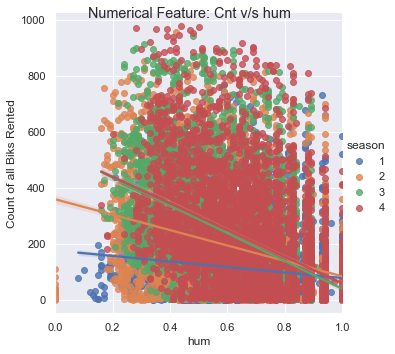

In [23]:
sns.lmplot(x="hum", y="cnt", data=df, hue="season")
plt.suptitle('Numerical Feature: Cnt v/s hum')
plt.xlabel('hum')
plt.ylabel('Count of all Biks Rented')

#### 4.4.4 Ride counts in relation to windspeed
* Fewer rides when the windspeed is very high
* Windspeed seems bearable when upto 0.4
* When windspeed increases beyond this point rides: massive decline

Text(30.990633333333335, 0.5, 'Count of all Biks Rented')

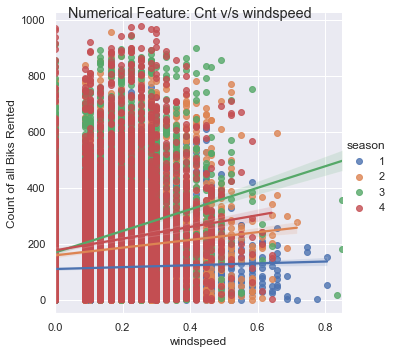

In [24]:
sns.lmplot(x="windspeed", y="cnt", data=df, hue="season")
plt.suptitle('Numerical Feature: Cnt v/s windspeed')
plt.xlabel('windspeed')
plt.ylabel('Count of all Biks Rented')

#### 4.4.5 Ride counts by date
* Seasonality: rides peak between May & October (summer time in the US)
* Growth year on year

<AxesSubplot:xlabel='dteday'>

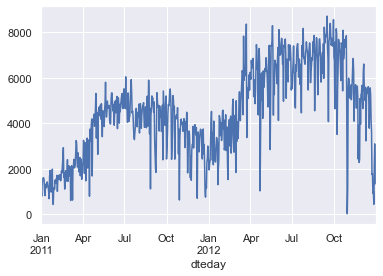

In [25]:
daily_rides = df.groupby(['dteday'])['cnt'].sum()
daily_rides.plot.line(x='dteday', y='cnt')

#### 4.4.6 Ride count seasonality
* Winter is amongst the two most rided season
* Possible explanation: increasing impact of global warming - shifting seasons slightly every year
* By far the most rides are booked when the weather is clear

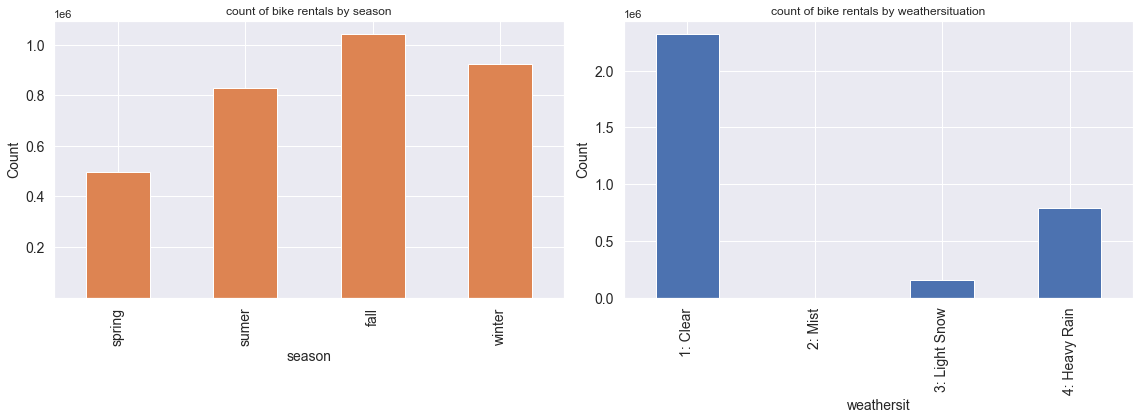

In [26]:
f,  (ax1, ax2)  =  plt.subplots(nrows=1, ncols=2, figsize=(16, 6)) #Defining output layout

ax1 = df[['season','cnt']].groupby(['season']).sum().reset_index().plot(kind='bar', 
                                       legend = False, title ="count of bike rentals by season", 
                                         stacked=True, fontsize=14, ax=ax1)#Chunk of code explains barplot1 parameters 
ax1.set_xlabel("season", fontsize=14) #Chart aesthetics and encoding
ax1.set_ylabel("Count", fontsize=14)
ax1.set_xticklabels(['spring','sumer','fall','winter'])

 
ax2 = df[['weathersit','cnt']].groupby(['weathersit']).sum().reset_index().plot(kind='bar',  
      legend = False, stacked=True, title ="count of bike rentals by weathersituation", fontsize=14, ax=ax2)#Chunk of code explains barplot1 parameters 

ax2.set_xlabel("weathersit", fontsize=14) #Chart aesthetics and encoding
ax2.set_ylabel("Count", fontsize=14)
ax2.set_xticklabels(['1: Clear','2: Mist','3: Light Snow','4: Heavy Rain'])

f.tight_layout()

#### 4.4.7 Average rides by day of week
* Thursday & Friday: busiest days for bike sharing companies and it seems Sunday is the rest day. 
* Huge implications for business context, which can be discussed in a less technical report 
* Implications: ride sharing companies could offer discounts on the not so popular days, in order to decrease the usage of environmentally unfriendly vehicles & of course boost their own sales.

Text(0, 0.5, 'Ride Count')

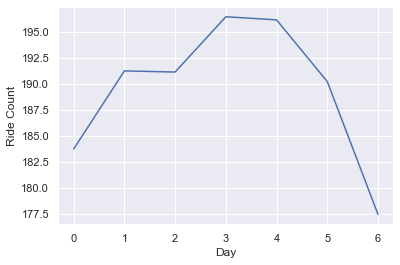

In [27]:
dayofweek_rides = df.groupby(['weekday'])['cnt'].mean()
dayofweek_rides.plot.line(x='weekday', y='cnt')

plt.xlabel('Day')
plt.ylabel("Ride Count")

#### 4.4.8 Average rides by time of day
* Choise made for the rush hour variable. 
* 1st peak hour is 08:00
* 2nd peak is 17:00
* Low activity between 23:00 & 05:00

Text(0, 0.5, 'Ride Count')

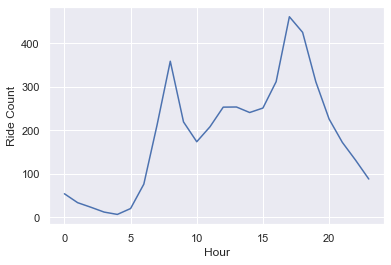

In [28]:
hourly_rides = df.groupby(['hr'])['cnt'].mean()
hourly_rides.plot.line(x='hr', y='cnt')

plt.xlabel('Hour')
plt.ylabel("Ride Count")

### 4.5 Weather analysis
#### 4.5.1 Boxplot for different measures of weather
* Higher range in temp, atemp & humidity 
* Windspeed has a lower variance & many outliers
* Implications: possible strategies for specific weather conditions have to be elaborated

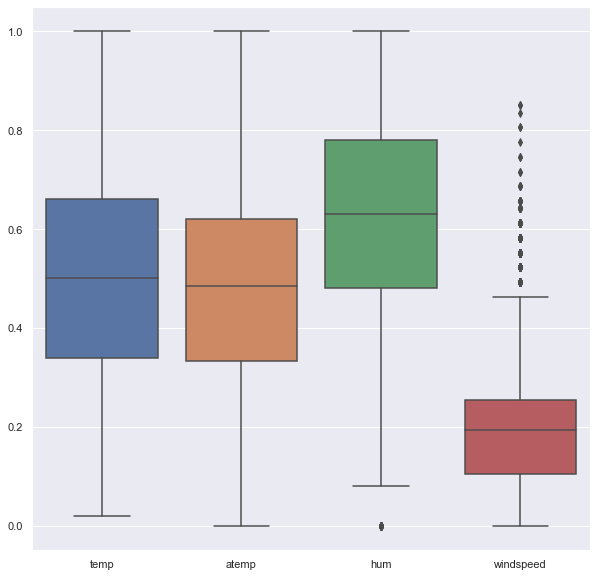

In [29]:
sns.boxplot(data=df[['temp',
       'atemp', 'hum', 'windspeed']])
fig=plt.gcf()
fig.set_size_inches(10,10)

#### 4.5.2 Distributions of different measures of weather

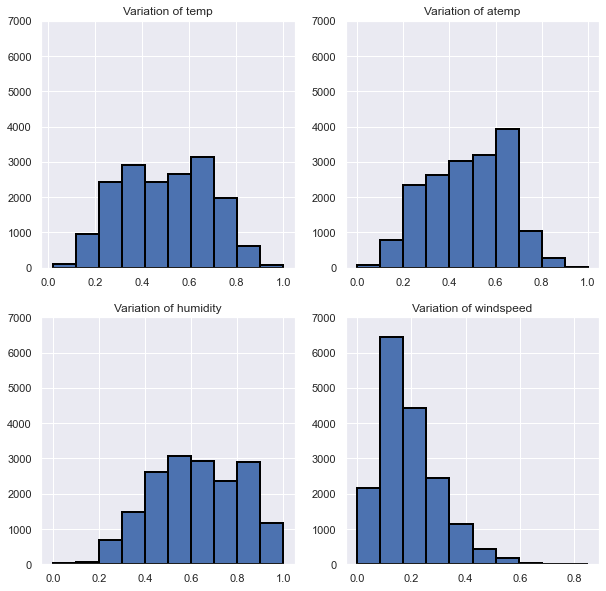

In [30]:
df.temp.unique()
fig,axes=plt.subplots(2,2)
axes[0,0].hist(x="temp",data=df,edgecolor="black",linewidth=2)
axes[0,0].set_title("Variation of temp")
axes[0,0].set_ylim([0, 7000]) #Fixing y axis so all graphs can be seen on the same scale
axes[0,1].hist(x="atemp",data=df,edgecolor="black",linewidth=2)
axes[0,1].set_title("Variation of atemp")
axes[0,1].set_ylim([0, 7000])
axes[1,0].hist(x="hum",data=df,edgecolor="black",linewidth=2)
axes[1,0].set_title("Variation of humidity")
axes[1,0].set_ylim([0, 7000])
axes[1,1].hist(x="windspeed",data=df,edgecolor="black",linewidth=2)
axes[1,1].set_title("Variation of windspeed")
axes[1,1].set_ylim([0, 7000])
fig.set_size_inches(10,10)

#### 4.5.3 Count of rides in different weather conditions
As seen in **4.4.6 Ride count seasonality**, one can see that good weather conditions have massive impact on ride counts.

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Clear, Few clouds, Partly cloudy, Partly cloudy'),
  Text(1, 0, 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist'),
  Text(2, 0, 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds'),
  Text(3, 0, 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog')])

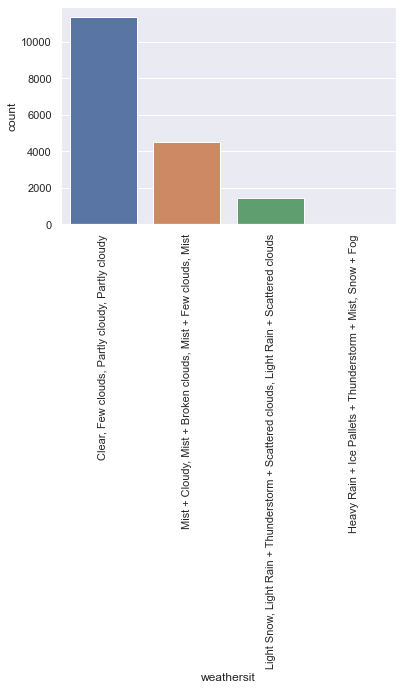

In [31]:
sns.countplot(data=df, x="weathersit")
plt.xticks(rotation=90)

## 5. ML Predictive Analytics

In [32]:
# defining target & feature columns:
X = df.drop(columns=['cnt'])
y = df[['cnt']]

In [33]:
# we are not allowed to use 2012 4th quarter for training our modals
X_train = X.loc[X['dteday']  < '2012-09-01']
X_test = X.loc[X['dteday']  >= '2012-09-01']
y_train = y.loc[X['dteday']  < '2012-09-01'] 
y_test = y.loc[X['dteday']  >= '2012-09-01']

In [34]:
X_train = X_train.drop(columns="dteday")
X_test = X_test.drop(columns="dteday")

In [35]:
print("Total variety of weather situations: \n {}".format(len(df['weathersit'].unique())))
print("----")
print("Different types of weather situations: \n {}".format(df['weathersit'].unique()))
print("----")
print("Weather situation distribution: \n {}".format(df['weathersit'].value_counts()))

Total variety of weather situations: 
 5
----
Different types of weather situations: 
 ['Clear, Few clouds, Partly cloudy, Partly cloudy'
 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist'
 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds'
 nan 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog']
----
Weather situation distribution: 
 Clear, Few clouds, Partly cloudy, Partly cloudy                                            11345
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                                4517
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds     1414
Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog                                     3
Name: weathersit, dtype: int64


### 5.1 Imputing and preprocessing

In [36]:
preprocessing = ColumnTransformer([
    
    # temp dropper 
    ("temp_dropper", "drop", ["temp"]),
    
    # round to 3 decimals 
    ("atemp_fill", Pipeline([
        ("atemp_imputer", KNNImputer(n_neighbors=2)),
        ("atemp_round_decimal", FunctionTransformer(lambda x: np.round(x, 3))),
    ]), ["atemp"]),
    
    # median imputer   
    ("hum_imputer", SimpleImputer(strategy="median"), ["hum"]),
    
    # median imputer
    ("wind_imputer", SimpleImputer(strategy="median"), ["windspeed"]),
    
    # fill with the most frequent and one hot encode the weathersit column
    ("weathersit_fill", Pipeline([
        ("weathersit_imputer", SimpleImputer(strategy='most_frequent')),
        ("weathersit_encode", OneHotEncoder()),
    ]), ["weathersit"]),
    
], remainder="passthrough")

In [37]:
# creating the pipeline
clf = Pipeline([
    ("preprocessing", preprocessing),
    ("pca", PCA()), # PCA before applying the linear regression
    ("regression", LinearRegression()) # start with linear regression but go deeper with other algorithms
])

In [38]:
# Displaying how the pre processing is constructed, stolen from Juan Carlos
set_config(display="diagram")
preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('temp_dropper', 'drop', ['temp']),
                                ('atemp_fill',
                                 Pipeline(steps=[('atemp_imputer',
                                                  KNNImputer(n_neighbors=2)),
                                                 ('atemp_round_decimal',
                                                  FunctionTransformer(func=<function <lambda> at 0x7fefc9b29040>))]),
                                 ['atemp']),
                                ('hum_imputer',
                                 SimpleImputer(strategy='median'), ['hum']),
                                ('wind_imputer',
                                 SimpleImputer(strategy='median'),
                                 ['windspeed']),
                                ('weathersit_fill',
                                 Pipeline(steps=[('weathersit_imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('weathersit_encode',
                                                  OneHotEncoder())]),
                                 ['weathersit'])])

### 5.2 Tuning the model
We have changed our mind and we are not going to use PCA for analysis:

In [39]:
# remove the PCA component in the pipeline
clf.set_params(pca=None)
# set the regression None since we are going to use param_grid
clf.set_params(regression=None)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('temp_dropper', 'drop',
                                                  ['temp']),
                                                 ('atemp_fill',
                                                  Pipeline(steps=[('atemp_imputer',
                                                                   KNNImputer(n_neighbors=2)),
                                                                  ('atemp_round_decimal',
                                                                   FunctionTransformer(func=<function <lambda> at 0x7fefc9b29040>))]),
                                                  ['atemp']),
                                                 ('hum_imputer',
                                                  SimpleImputer(strategy='median'),
                                                  ['hum']),
                                                 ('wind_imputer',
                                                  SimpleImputer(strategy='median'),
                                                  ['windspeed']),
                                                 ('weathersit_fill',
                                                  Pipeline(steps=[('weathersit_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('weathersit_encode',
                                                                   OneHotEncoder())]),
                                                  ['weathersit'])])),
                ('pca', None), ('regression', None)])

In [40]:
# creating the list of algorithms and hyperparameters to try:
# we reduced the number of test hyperparameters to reduce execution time of the notebook: "tried" hyperparameters
param_grid = [
    {
        "regression": [LinearRegression()],
        "regression__normalize": [False], # True tried
    },
    {
        "regression": [DecisionTreeRegressor()], 
        "regression__max_depth": [10], # 5 tried
        "regression__random_state": [seed],
    },
    {
        "regression": [RandomForestRegressor()],
        "regression__random_state": [seed],
        "regression__max_depth": [10],  # 5 tried
        "regression__n_estimators": [30],  # 50 tried
        "regression__max_features": [0.7]  # 0.8 tried
    }
]

#### 5.2.1 Cross validation
Cross validating the model, to have different outcomes to be compared:

In [41]:
clf = GridSearchCV(clf, param_grid, n_jobs=-1, cv=10, scoring="r2")

### 5.3 Obtaining accurate predictions
Fitting the model to obtain accurate predictions and making sure, this report can help bike sharing companies for future stragies.

In [42]:
clf.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('temp_dropper',
                                                                         'drop',
                                                                         ['temp']),
                                                                        ('atemp_fill',
                                                                         Pipeline(steps=[('atemp_imputer',
                                                                                          KNNImputer(n_neighbors=2)),
                                                                                         ('atemp_round_decimal',
                                                                                          FunctionTransformer(func=<function <lambda> at 0x7fefc9b29040>))]),
                                                                         ['atemp']),
                                                                        ('hum_imputer',
                                                                         SimpleImpute...
                          'regression__normalize': [False]},
                         {'regression': [DecisionTreeRegressor()],
                          'regression__max_depth': [10],
                          'regression__random_state': [120]},
                         {'regression': [RandomForestRegressor(max_depth=10,
                                                               max_features=0.7,
                                                               n_estimators=30,
                                                               random_state=120)],
                          'regression__max_depth': [10],
                          'regression__max_features': [0.7],
                          'regression__n_estimators': [30],
                          'regression__random_state': [120]}],
             scoring='r2')

In [43]:
# listing the best parameters for the param_grid:
clf.best_params_

{'regression': RandomForestRegressor(max_depth=10, max_features=0.7, n_estimators=30,
                       random_state=120),
 'regression__max_depth': 10,
 'regression__max_features': 0.7,
 'regression__n_estimators': 30,
 'regression__random_state': 120}

In [44]:
# get the best score
clf.best_score_

0.7589958719056065

In [45]:
# list all the scores of different models
test_scores = clf.cv_results_['mean_test_score']
test_scores

array([0.27982036, 0.61119945, 0.75899587])

#### 5.3.1 Choossing the best model to predict
It was experimented with a lot of algorithms and hyperparameters. The best r2 score can be obtained above.

In [46]:
# get the model with the best estimator
clf.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('temp_dropper', 'drop',
                                                  ['temp']),
                                                 ('atemp_fill',
                                                  Pipeline(steps=[('atemp_imputer',
                                                                   KNNImputer(n_neighbors=2)),
                                                                  ('atemp_round_decimal',
                                                                   FunctionTransformer(func=<function <lambda> at 0x7fefc9b29040>))]),
                                                  ['atemp']),
                                                 ('hum_imputer',
                                                  SimpleImputer(strategy='median'),
                                                  ['hum']),
                                                 ('wind_imputer',
                                                  SimpleImputer(strategy='median'),
                                                  ['windspeed']),
                                                 ('weathersit_fill',
                                                  Pipeline(steps=[('weathersit_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('weathersit_encode',
                                                                   OneHotEncoder())]),
                                                  ['weathersit'])])),
                ('pca', None),
                ('regression',
                 RandomForestRegressor(max_depth=10, max_features=0.7,
                                       n_estimators=30, random_state=120))])

In [47]:
# retrieve all performance metrics
results = clf.cv_results_
results

{'mean_fit_time': array([2.65817857, 2.52372818, 3.25501976]),
 'std_fit_time': array([0.16009211, 0.19158676, 0.46448727]),
 'mean_score_time': array([0.10775702, 0.0879251 , 0.10534585]),
 'std_score_time': array([0.02906113, 0.01280654, 0.02712571]),
 'param_regression': masked_array(data=[LinearRegression(), DecisionTreeRegressor(),
                    RandomForestRegressor(max_depth=10, max_features=0.7, n_estimators=30,
                       random_state=120)],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'param_regression__normalize': masked_array(data=[False, --, --],
              mask=[False,  True,  True],
        fill_value='?',
             dtype=object),
 'param_regression__max_depth': masked_array(data=[--, 10, 10],
              mask=[ True, False, False],
        fill_value='?',
             dtype=object),
 'param_regression__random_state': masked_array(data=[--, 120, 120],
              mask=[ True, False, False],
   

In [48]:
# test manually using the developed test set:
clf.best_estimator_.score(X_test, y_test)

0.8467771828167112

In [49]:
# let's use the test set to create predictions
predictions = clf.best_estimator_.predict(X_test)

In [50]:
# calculating the r2 score manually
r2_score(y_test, predictions)

0.8467771828167112

#### 5.4 Create a graph for actual values and predictions comparison:

Create a data frame that includes both predictions and actual people counts:

In [51]:
comparison_df = y_test[['cnt']]

In [52]:
comparison_df['predictions'] = predictions
comparison_df.head(20)

,cnt,predictions
instant,,
14492,168,161.580119
14493,79,97.031389
14494,69,84.561546
14495,35,35.681540
14496,12,14.645882
14497,22,12.117233
14498,36,30.592529
14499,66,112.559003
14500,162,174.583586


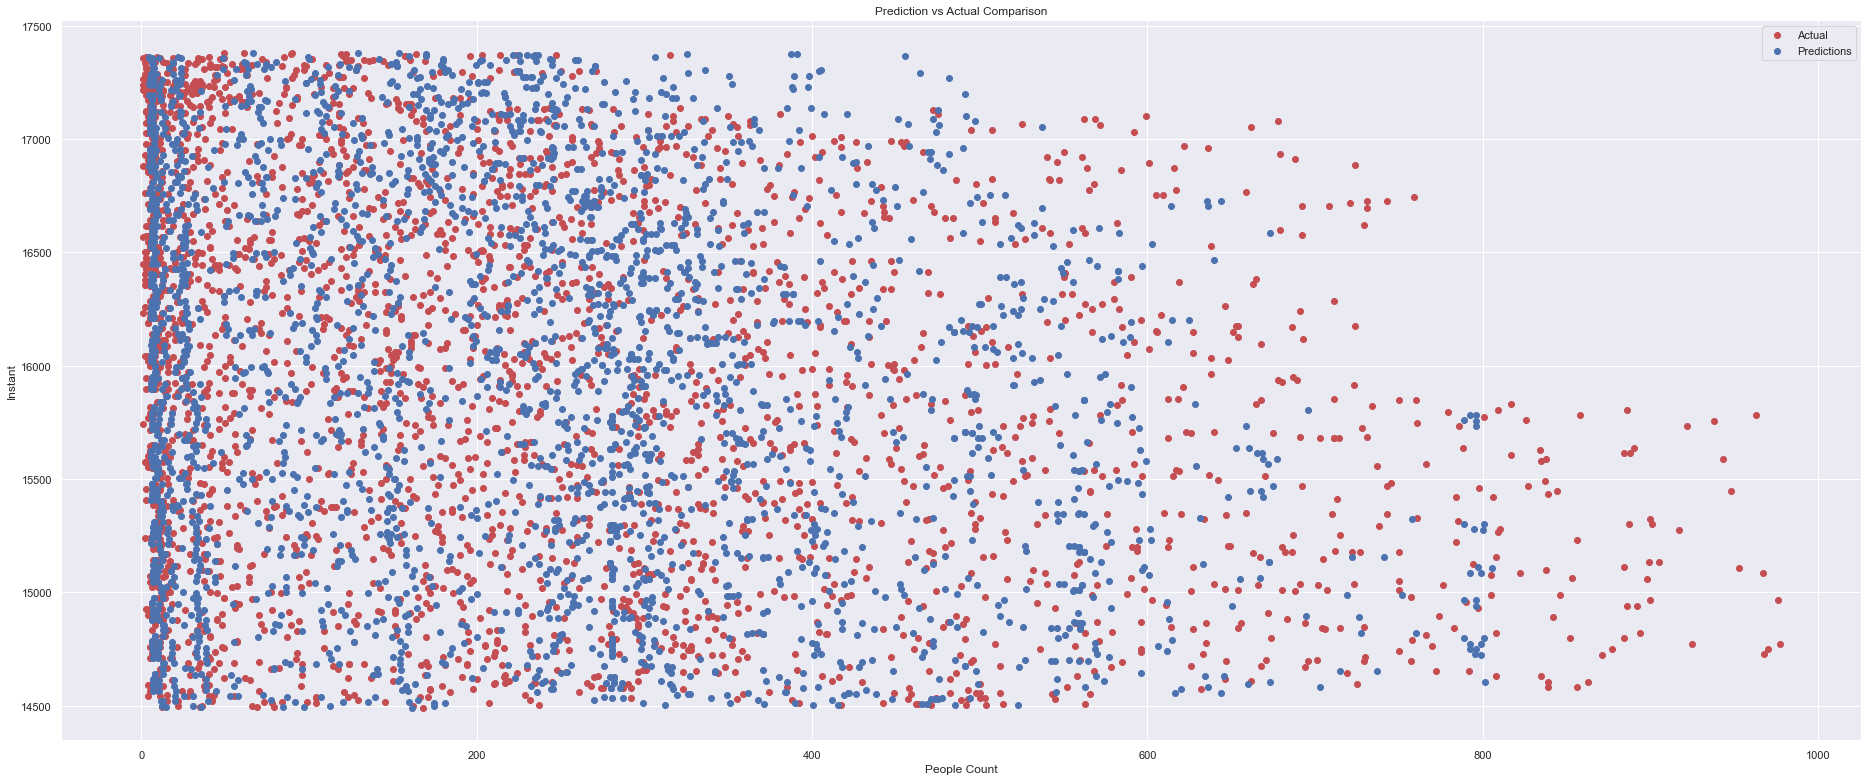

In [53]:
actual_scatter = comparison_df["cnt"]
prediction_scatter = comparison_df["predictions"]
instance_range = comparison_df.index
fig=plt.figure()

# change the size of plots
fig.set_size_inches(25, 10, forward=True)
ax=fig.add_axes([0,0,1,1])
ax.scatter(actual_scatter, instance_range, color='r', label="Actual")
ax.scatter(prediction_scatter, instance_range, color='b', label="Predictions")
ax.set_xlabel('People Count')
ax.set_ylabel('Instant')
ax.set_title('Prediction vs Actual Comparison')

plt.legend()
plt.show()

We selected one month to get the visual predictions, since the hour data becomes to cluttered for more months

In [54]:
from ipywidgets import interact
import matplotlib.pyplot as plt

# potentially to show more subplots
def f(Prediction_Only):
    fig, axes = plt.subplots(1,1, figsize=(20,7), sharex=True)
    axes.set_ylabel('Number of trips per day', fontsize=15)
    axes.set_title('Actual vs FORECAST : The next MONTH', fontsize=18, color = "green") 


    if Prediction_Only:
        axes.set_ylim([0, 1050])
        prediction_scatter.head(721).plot(figsize=(15, 6), color='lightcoral', linewidth=2)
        actual_scatter.head(721).plot(figsize=(15, 6), linewidth=2)
        axes.set_xlabel('Firt month predictions by hour', fontsize=15)
        axes.legend(['Prediction', 'Actual'], loc='upper left', fontsize=11, frameon=True) 
    else:
        axes.set_ylim([0, 1050])
        prediction_scatter.head(721).plot(figsize=(15, 6), color='lightcoral', linewidth=2)
        axes.set_xlabel('Firt month predictions by hour', fontsize=15)
        axes.legend(['Prediction'], loc='upper left', fontsize=11, frameon=True) 

interact(f, Prediction_Only=True)

interactive(children=(Checkbox(value=True, description='Prediction_Only'), Output()), _dom_classes=('widget-in…

<function __main__.f(Prediction_Only)>

### 5.5 Plotting Validation Results


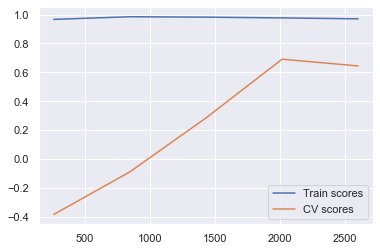

In [55]:
# determines cross-validated training and test scores for different training set sizes.
# .values will give the values in an array. (shape: (n,1) and .ravel will convert that array shape to (n, )
train_sizes, train_scores, cv_scores = learning_curve(clf.best_estimator_, X_test, y_test.values.ravel(), cv=10)

plt.plot(train_sizes, train_scores.mean(axis=1), label="Train scores")
plt.plot(train_sizes, cv_scores.mean(axis=1), label="CV scores")

plt.legend()

In [56]:
len(X_test)

2888

We get the best score around 0.3 split in the test dataset:

In [57]:
round(2000/2888, 2)

0.69

## 6. Conclusion
* Report = beneficial for US bike sharing companies in the future 
* Can be foundation for other data sets, ie. bike sharing in Europe
* When a company has information on weather conditions: could understand the avereage ride sharing behavior in US